This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
#正規化
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
#向MNIST添加白噪聲通道或全零通道
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [2]:
print(train_images_with_noise_channels)

[[0.         0.         0.         ... 0.86951522 0.60460456 0.50080854]
 [0.         0.         0.         ... 0.6512873  0.4971629  0.44089091]
 [0.         0.         0.         ... 0.72354367 0.80476684 0.67880474]
 ...
 [0.         0.         0.         ... 0.70578945 0.45130066 0.84526218]
 [0.         0.         0.         ... 0.73195914 0.77499406 0.33724308]
 [0.         0.         0.         ... 0.22733655 0.20159077 0.28914862]]


In [3]:
print(train_images_with_zeros_channels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Training the same model on MNIST data with noise channels or all-zero channels**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

#自己定義且構建一個model

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),#第一層（輸入層）有512個隱藏神經元 
        layers.Dense(10, activation="softmax")
        #輸出層的激活函數選取softmax，這樣可以求取每個取值的概率，這裏一共10個概率且和爲1。
    ])
    #設置模型的損失函數、優化器、評估標準
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()#呼叫自定義model 且assign給model變數
history_noise = model.fit(#model.fit()進行訓練
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
#x 即訓練數據；
#y 即訓練數據標籤；
#epochs 即將訓練數據迭代次數；
#batch_size 即批大小；
#設定參數validation_split=0.2
#訓練前keras會將資料分成80%訓練資料與20%驗證資料。
#假設為全部是60000筆，所以分成600000.8=48000作為訓練資料，600000.2=12000作為驗證資料)


Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.6254 - accuracy: 0.8111 - val_loss: 0.2527 - val_accuracy: 0.9248
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2520 - accuracy: 0.9221 - val_loss: 0.2556 - val_accuracy: 0.9218
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1654 - accuracy: 0.9483 - val_loss: 0.1717 - val_accuracy: 0.9496
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1156 - accuracy: 0.9634 - val_loss: 0.1528 - val_accuracy: 0.9544
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0832 - accuracy: 0.9738 - val_loss: 0.1886 - val_accuracy: 0.9488
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0635 - accuracy: 0.9795 - val_loss: 0.1495 - val_accuracy: 0.9569
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0474 - accuracy: 0.9847 - val_loss: 0.1470 - val_accuracy: 0.9614
Epoch 

In [6]:
#解釋同上
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2898 - accuracy: 0.9154 - val_loss: 0.1542 - val_accuracy: 0.9552
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1203 - accuracy: 0.9647 - val_loss: 0.1067 - val_accuracy: 0.9704
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0786 - accuracy: 0.9769 - val_loss: 0.0977 - val_accuracy: 0.9717
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0564 - accuracy: 0.9834 - val_loss: 0.1010 - val_accuracy: 0.9719
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.0816 - val_accuracy: 0.9764
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0322 - accuracy: 0.9908 - val_loss: 0.0800 - val_accuracy: 0.9768
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0242 - accuracy: 0.9930 - val_loss: 0.0829 - val_accuracy: 0.9787
Epoch 

**Plotting a validation accuracy comparison**

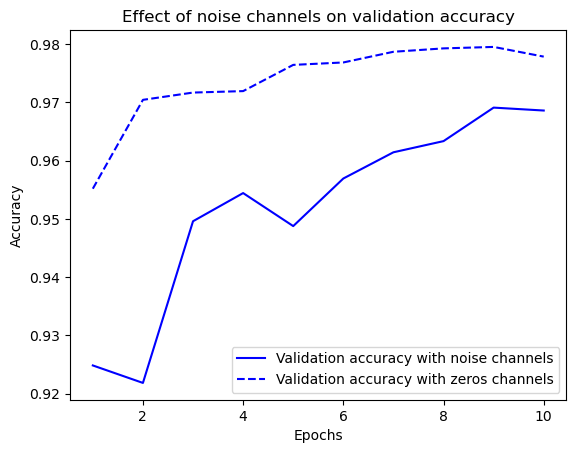

In [7]:
#繪製訓練精度和驗證精度
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [10]:
(train_images, train_labels), _ = mnist.load_data()
#正規化
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)
#shuffle()可隨機打亂原始數組

#構建網絡
model = keras.Sequential([
    layers.Dense(512, activation="relu"),#輸入層(第一層)有512個隱藏神經元
    layers.Dense(10, activation="softmax")#輸出層有10維 softmax(這樣可以讓output每一維的機率和為1)
])
#設置模型的損失函數、優化器、評估標準
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, random_train_labels,
          epochs=20,#(此處訓練20次不夠！要至少100 準確率才會高)
          batch_size=128,
          validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 2.3168 - accuracy: 0.1046 - val_loss: 2.3074 - val_accuracy: 0.1018
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2997 - accuracy: 0.1171 - val_loss: 2.3145 - val_accuracy: 0.1028
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2911 - accuracy: 0.1268 - val_loss: 2.3161 - val_accuracy: 0.1032
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2770 - accuracy: 0.1416 - val_loss: 2.3311 - val_accuracy: 0.1016
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2601 - accuracy: 0.1531 - val_loss: 2.3382 - val_accuracy: 0.0993
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2390 - accuracy: 0.1709 - val_loss: 2.3501 - val_accuracy: 0.0997
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2150 - accuracy: 0.1831 - val_loss: 2.3685 - val_accuracy: 0.0986
Epoch 

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [14]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(0.001),
              #keras.optimizers.RMSprop()參數越小，loss會越小！準確率越高！
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2887 - accuracy: 0.9174 - val_loss: 0.1427 - val_accuracy: 0.9604
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1181 - accuracy: 0.9653 - val_loss: 0.1082 - val_accuracy: 0.9679
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0778 - accuracy: 0.9768 - val_loss: 0.0960 - val_accuracy: 0.9705
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0560 - accuracy: 0.9832 - val_loss: 0.0914 - val_accuracy: 0.9734
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0414 - accuracy: 0.9874 - val_loss: 0.0900 - val_accuracy: 0.9752
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0312 - accuracy: 0.9908 - val_loss: 0.0803 - val_accuracy: 0.9772
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0230 - accuracy: 0.9934 - val_loss: 0.0853 - val_accuracy: 0.9774
Epoch 

**The same model with a more appropriate learning rate**

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),#1e-2 = 0.01 
              #由於0.01比上題程式碼參數較小，所以loss較大，準確率較低！
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3600 - accuracy: 0.9131 - val_loss: 0.2134 - val_accuracy: 0.9428
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1439 - accuracy: 0.9637 - val_loss: 0.1687 - val_accuracy: 0.9614
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1121 - accuracy: 0.9728 - val_loss: 0.1613 - val_accuracy: 0.9700
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0968 - accuracy: 0.9785 - val_loss: 0.1667 - val_accuracy: 0.9729
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0859 - accuracy: 0.9821 - val_loss: 0.1981 - val_accuracy: 0.9707
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0746 - accuracy: 0.9852 - val_loss: 0.2651 - val_accuracy: 0.9625
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0765 - accuracy: 0.9863 - val_loss: 0.2196 - val_accuracy: 0.9743
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [16]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.6573 - accuracy: 0.8401 - val_loss: 0.3620 - val_accuracy: 0.9021
Epoch 2/20
375/375 [==============================] - 0s 825us/step - loss: 0.3502 - accuracy: 0.9035 - val_loss: 0.3077 - val_accuracy: 0.9148
Epoch 3/20
375/375 [==============================] - 0s 836us/step - loss: 0.3149 - accuracy: 0.9124 - val_loss: 0.2895 - val_accuracy: 0.9187
Epoch 4/20
375/375 [==============================] - 0s 815us/step - loss: 0.2986 - accuracy: 0.9161 - val_loss: 0.2813 - val_accuracy: 0.9218
Epoch 5/20
375/375 [==============================] - 0s 823us/step - loss: 0.2895 - accuracy: 0.9190 - val_loss: 0.2751 - val_accuracy: 0.9241
Epoch 6/20
375/375 [==============================] - 0s 847us/step - loss: 0.2828 - accuracy: 0.9208 - val_loss: 0.2725 - val_accuracy: 0.9252
Epoch 7/20
375/375 [==============================] - 0s 866us/step - loss: 0.2777 - accuracy: 0.9221 - val_loss: 0.2676 - val_accuracy: 0

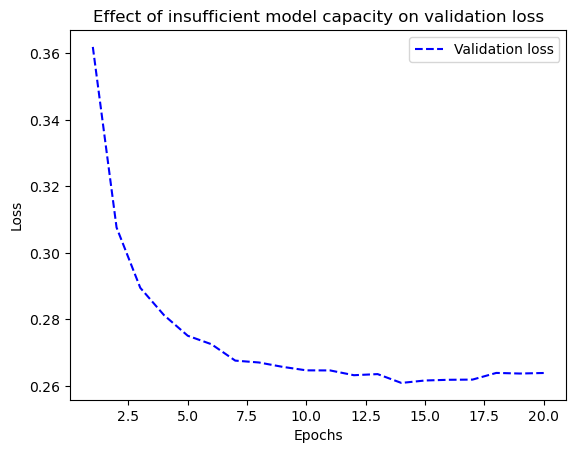

In [17]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [18]:
model = keras.Sequential([
    #TensorFlow 輸入神經元的個數等於上一層的輸出。
    layers.Dense(96, activation="relu"),#輸入層 96個隱藏神經元
    layers.Dense(96, activation="relu"),#輸入層 同上
    layers.Dense(10, activation="softmax"),#輸出層 10維
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3607 - accuracy: 0.8990 - val_loss: 0.1863 - val_accuracy: 0.9469
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1638 - accuracy: 0.9511 - val_loss: 0.1541 - val_accuracy: 0.9537
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1160 - accuracy: 0.9659 - val_loss: 0.1220 - val_accuracy: 0.9639
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9727 - val_loss: 0.1026 - val_accuracy: 0.9709
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9778 - val_loss: 0.1034 - val_accuracy: 0.9697
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0598 - accuracy: 0.9823 - val_loss: 0.1016 - val_accuracy: 0.9717
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0965 - val_accuracy: 0.9731
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [22]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

#vectorize_sequences()將數據向量化
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)
#構建model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    #小發現：通常激勵函數是sigmoid 維度都只有1!
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
40/40 [==============================] - 1s 25ms/step - loss: 0.4888 - accuracy: 0.8089 - val_loss: 0.3561 - val_accuracy: 0.8774
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.2858 - accuracy: 0.9057 - val_loss: 0.2894 - val_accuracy: 0.8892
Epoch 3/20
40/40 [==============================] - 1s 14ms/step - loss: 0.2146 - accuracy: 0.9263 - val_loss: 0.2711 - val_accuracy: 0.8944
Epoch 4/20
40/40 [==============================] - 1s 14ms/step - loss: 0.1756 - accuracy: 0.9400 - val_loss: 0.2752 - val_accuracy: 0.8906
Epoch 5/20
40/40 [==============================] - 1s 15ms/step - loss: 0.1474 - accuracy: 0.9495 - val_loss: 0.2866 - val_accuracy: 0.8892
Epoch 6/20
40/40 [==============================] - 1s 17ms/step - loss: 0.1251 - accuracy: 0.9585 - val_loss: 0.2967 - val_accuracy: 0.8884
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - loss: 0.1059 - accuracy: 0.9658 - val_loss: 0.3228 - val_accuracy: 0.8840
Epoch 8/20
40

**Version of the model with lower capacity**

In [25]:
#只是改數字 隱藏神經元的數量很少的情況下
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6149 - accuracy: 0.7202 - val_loss: 0.5391 - val_accuracy: 0.8379
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4856 - accuracy: 0.8643 - val_loss: 0.4633 - val_accuracy: 0.8304
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3940 - accuracy: 0.9079 - val_loss: 0.3917 - val_accuracy: 0.8929
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3200 - accuracy: 0.9268 - val_loss: 0.3504 - val_accuracy: 0.8730
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2647 - accuracy: 0.9360 - val_loss: 0.3168 - val_accuracy: 0.8805
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2235 - accuracy: 0.9426 - val_loss: 0.2898 - val_accuracy: 0.8944
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1941 - accuracy: 0.9488 - val_loss: 0.2815 - val_accuracy: 0.8921
Epoch 8/20
30

**Version of the model with higher capacity**

In [26]:
#也只是改數字，隱藏神經元數量很高的情況下
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)
#結論：神經元個數越多，準確率並沒有越高。

Epoch 1/20
30/30 [==============================] - 5s 146ms/step - loss: 0.5594 - accuracy: 0.7681 - val_loss: 0.3211 - val_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 4s 123ms/step - loss: 0.2532 - accuracy: 0.8995 - val_loss: 0.2779 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 4s 126ms/step - loss: 0.1377 - accuracy: 0.9496 - val_loss: 0.3398 - val_accuracy: 0.8767
Epoch 4/20
30/30 [==============================] - 4s 122ms/step - loss: 0.0775 - accuracy: 0.9737 - val_loss: 0.4404 - val_accuracy: 0.8733
Epoch 5/20
30/30 [==============================] - 4s 123ms/step - loss: 0.0916 - accuracy: 0.9789 - val_loss: 0.3584 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 4s 128ms/step - loss: 0.0045 - accuracy: 0.9995 - val_loss: 0.5295 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 4s 128ms/step - loss: 5.2765e-04 - accuracy: 1.0000 - val_loss: 0.6500 - val_accuracy: 0.8870
Ep

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [27]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 #正則化透過添加人為的限制，對過於激活的神經元進行懲罰，讓他的值向0靠攏
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5965 - accuracy: 0.7869 - val_loss: 0.5190 - val_accuracy: 0.7975
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3984 - accuracy: 0.8923 - val_loss: 0.3865 - val_accuracy: 0.8863
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3354 - accuracy: 0.9107 - val_loss: 0.3682 - val_accuracy: 0.8869
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2986 - accuracy: 0.9269 - val_loss: 0.3923 - val_accuracy: 0.8717
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2843 - accuracy: 0.9293 - val_loss: 0.3806 - val_accuracy: 0.8777
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2656 - accuracy: 0.9386 - val_loss: 0.3614 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2605 - accuracy: 0.9379 - val_loss: 0.3795 - val_accuracy: 0.8775
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [28]:
#只是改數字
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [29]:
#Dropout 是一種對抗過擬合的正則化方法
#Dropout 層在訓練期間以每一步的頻率隨機將輸入單元設置為 0 ，這有助於防止過度擬合。
#創建Dopout正則化時，可以將 dropout rate的設為某一固定值，
#當dropout rate=0.8時，實際上，保留概率為0.2。下面的例子中，dropout rate=0.5。

model = keras.Sequential([
    #將Dropout層添加到模型的現有層和之前的輸出層之間，神經網絡將這些輸出反饋到後續層中。
    #用dense（）方法指定兩個全連接網絡層：
    #在這兩層中間插入一個dropout層，這樣一來，第一層的輸出將對第二層實現Dropout正則化，後續層與此類似。
    #現在，我們對第二層和輸出層實現了Dropout正則化。

原文網址：https://kknews.cc/code/6qrg3zp.html

    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.6281 - accuracy: 0.6320 - val_loss: 0.5336 - val_accuracy: 0.8410
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5276 - accuracy: 0.7406 - val_loss: 0.4277 - val_accuracy: 0.8709
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4567 - accuracy: 0.7989 - val_loss: 0.3577 - val_accuracy: 0.8812
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3957 - accuracy: 0.8480 - val_loss: 0.3336 - val_accuracy: 0.8799
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3385 - accuracy: 0.8786 - val_loss: 0.2906 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3074 - accuracy: 0.8985 - val_loss: 0.2800 - val_accuracy: 0.8902
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2692 - accuracy: 0.9093 - val_loss: 0.2726 - val_accuracy: 0.8941
Epoch 8/20
30

## Summary